In [2]:
!pip install wordcloud textblob matplotlib pandas nltk seaborn sklearn


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from google.colab import drive

nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
folder_path = "/content/drive/MyDrive/Aggregated Text Files"  # Replace with your folder path

all_text = ""
for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):
        file_path = os.path.join(folder_path, filename)
        try:
            with open(file_path, 'r', encoding='utf-8') as f:
                all_text += f.read() + " "
        except UnicodeDecodeError:
            with open(file_path, 'r', encoding='ISO-8859-1') as f:
                all_text += f.read() + " "


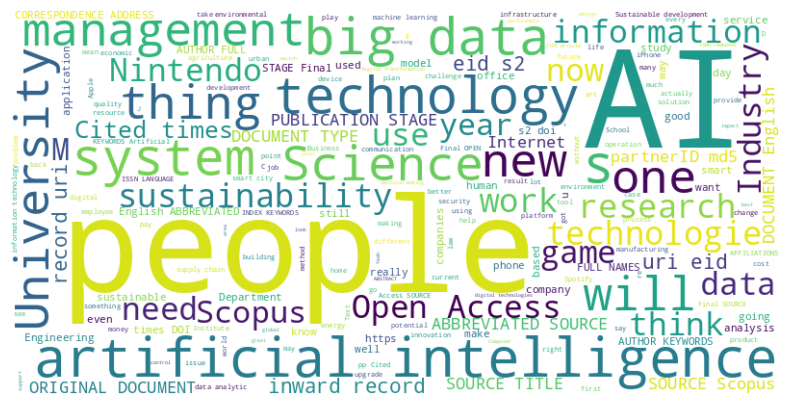

In [7]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


<ipython-input-13-2633790138f2>:39: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, orientation='horizontal', pad=0.05)


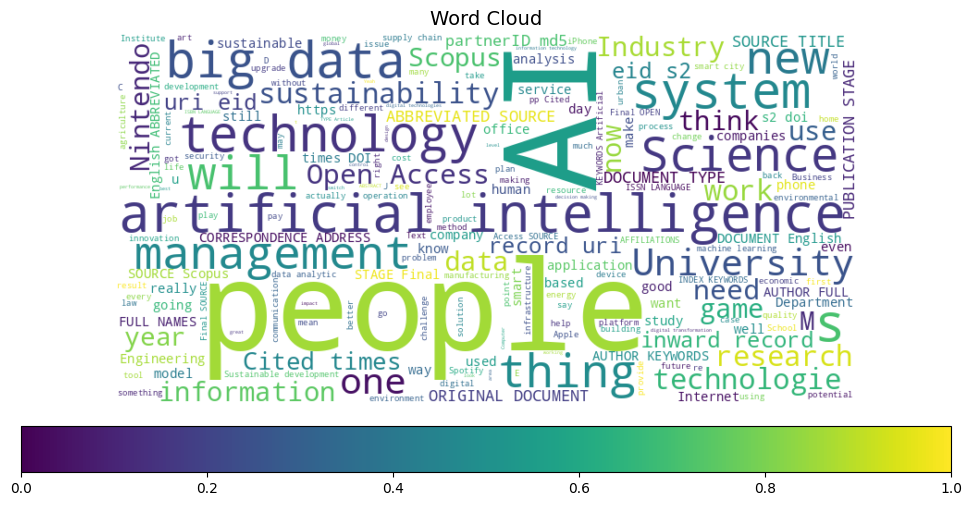

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

# Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    prefer_horizontal=1,  # Keep most words horizontal
    relative_scaling=0.5,  # Scale larger words a bit more
    contour_color='black',  # Add border for better shape definition
    contour_width=1.5,
    colormap='viridis',  # Color scheme for word cloud
).generate(all_text)

# Make the word cloud elliptical
x, y = np.ogrid[:400, :800]  # Define elliptical mask size
mask = (x - 200) ** 2 / 400**2 + (y - 400) ** 2 / 800**2 > 1  # Elliptical shape
mask = 255 * mask.astype(int)

# Apply the mask to the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    mask=mask,
    background_color='white',
    contour_color='black',
    colormap='viridis'
).generate(all_text)

# Plot the word cloud with a color bar
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Add color bar
sm = plt.cm.ScalarMappable(cmap='viridis')
plt.colorbar(sm, orientation='horizontal', pad=0.05)
plt.title("Word Cloud", fontsize=14)
plt.show()


Overall Sentiment Polarity: 0.09011643603424534


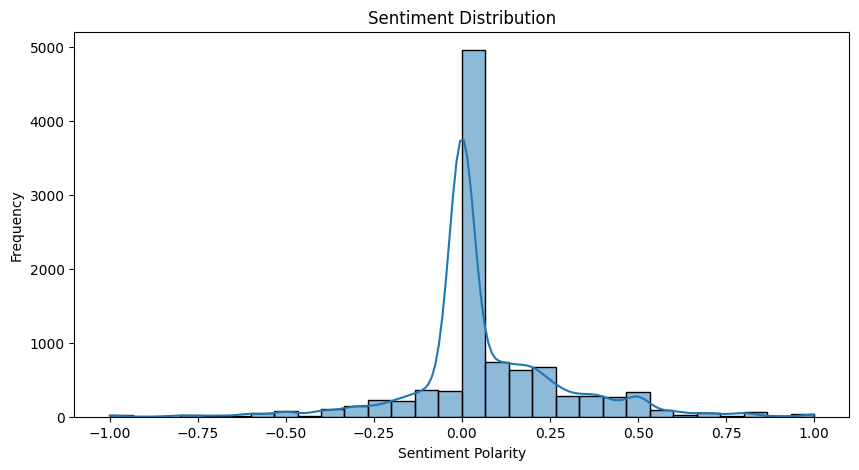

In [8]:
blob = TextBlob(all_text)
sentiment_score = blob.sentiment.polarity  # Range: [-1, 1]

print(f"Overall Sentiment Polarity: {sentiment_score}")

# Visualize sentiment distribution
sentences = nltk.sent_tokenize(all_text)
sentiments = [TextBlob(sentence).sentiment.polarity for sentence in sentences]

plt.figure(figsize=(10, 5))
sns.histplot(sentiments, bins=30, kde=True)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Frequency")
plt.show()


<ipython-input-9-15566f1d71bf>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=word_freq_sum.values, y=word_freq_sum.index, palette='Blues_d')


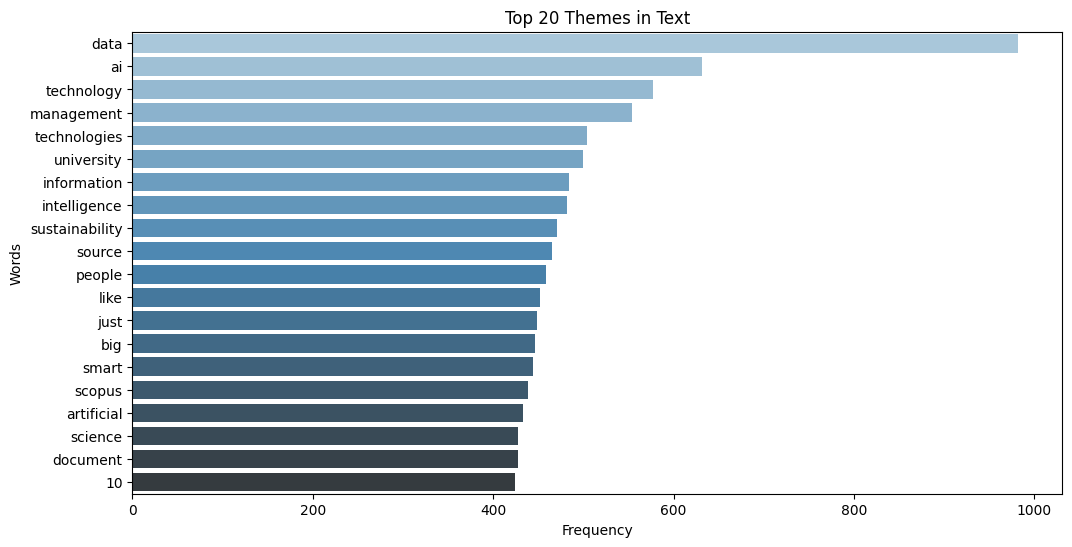

In [9]:
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform([all_text])

# Create a DataFrame with word frequencies
word_freq_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
word_freq_sum = word_freq_df.sum().sort_values(ascending=False).head(20)

# Plot the most common words
plt.figure(figsize=(12, 6))
sns.barplot(x=word_freq_sum.values, y=word_freq_sum.index, palette='Blues_d')
plt.title("Top 20 Themes in Text")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()


Top 10 Independent Factors Affecting Sentiment:
000: 0.0001
data: -0.0000
management: -0.0000
technology: -0.0000
ai: -0.0000
sustainability: -0.0000
technologies: -0.0000
author: -0.0000
like: -0.0000
people: -0.0000


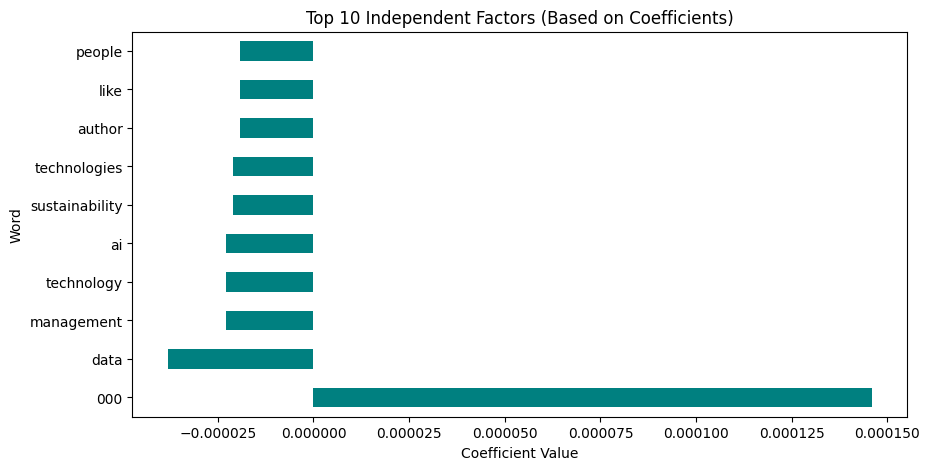

In [11]:
# Prepare data for regression
word_freq_df = word_freq_df.T  # Transpose to align words as features
word_freq_df['sentiment'] = sentiments[:len(word_freq_df)]  # Trim to match sizes if necessary

# Independent variables: word frequencies; Dependent variable: sentiment score
X = word_freq_df.drop('sentiment', axis=1)
y = word_freq_df['sentiment']

# Train a linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the most significant features (independent factors)
coefficients = pd.Series(model.coef_, index=X.columns)
significant_factors = coefficients.sort_values(key=abs, ascending=False).head(10)

# Print the top 10 factors
print("Top 10 Independent Factors Affecting Sentiment:")
for word, coef in significant_factors.items():
    print(f"{word}: {coef:.4f}")

# Plot the top 10 factors
plt.figure(figsize=(10, 5))
significant_factors.plot(kind='barh', color='teal')
plt.title("Top 10 Independent Factors (Based on Coefficients)")
plt.xlabel("Coefficient Value")
plt.ylabel("Word")
plt.show()


Top 10 Independent Factors Affecting Sentiment:
000: 0.0001
data: -0.0000
management: -0.0000
technology: -0.0000
ai: -0.0000
sustainability: -0.0000
technologies: -0.0000
author: -0.0000
like: -0.0000
people: -0.0000

Top 10 Dependent Factors (Highly Correlated with Sentiment):
copyright: -1.0000
ability: -1.0000
console: -1.0000
content: -1.0000
s2: -1.0000
human: -1.0000
ce: -1.0000
algorithms: -1.0000
idea: -1.0000
couple: -1.0000


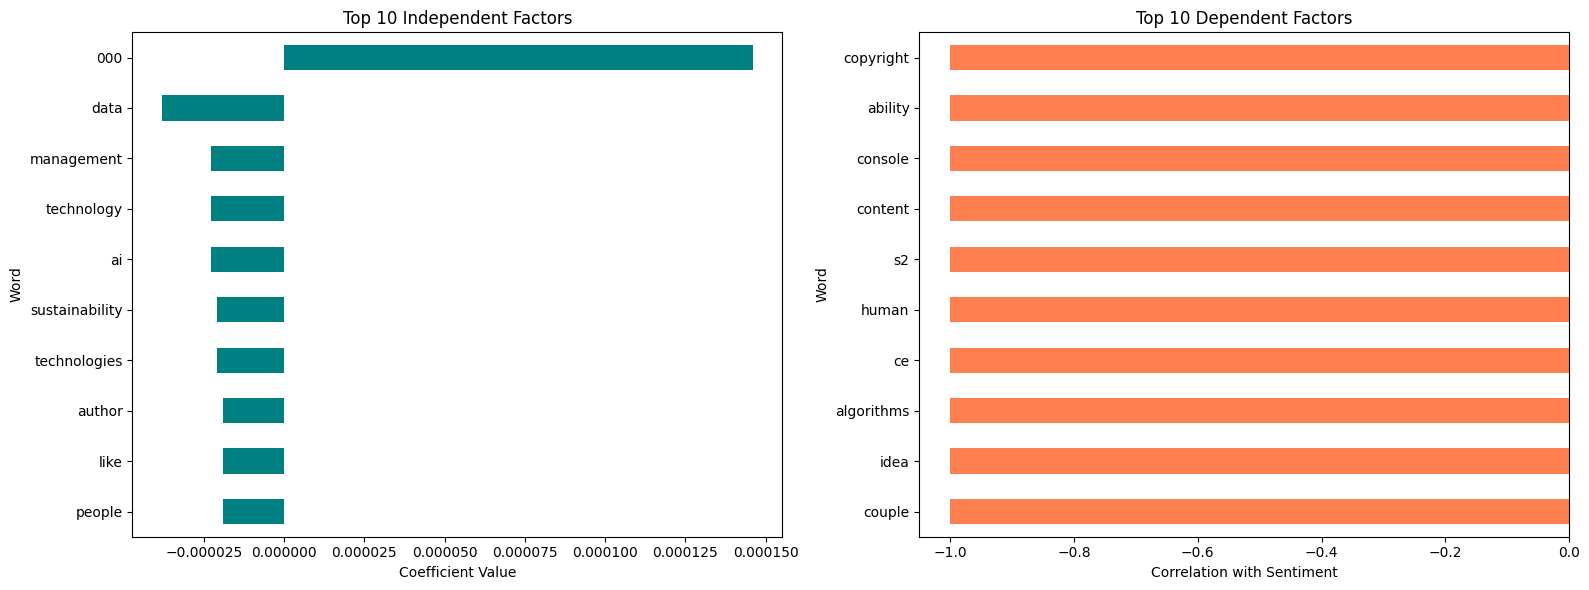

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

# Prepare the dataset
word_freq_df = word_freq_df.T  # Align words as features
word_freq_df['sentiment'] = sentiments[:len(word_freq_df)]  # Ensure matching lengths

# Define independent (X) and dependent (y) variables
X = word_freq_df.drop('sentiment', axis=1)
y = word_freq_df['sentiment']

# Train the Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Extract coefficients to identify independent factors
coefficients = pd.Series(model.coef_, index=X.columns)
independent_factors = coefficients.sort_values(key=abs, ascending=False).head(10)

# Identify dependent factors (correlation with sentiment score)
correlations = word_freq_df.corr()['sentiment'].drop('sentiment')
dependent_factors = correlations.sort_values(key=abs, ascending=False).head(10)

# Print the top 10 Independent and Dependent Factors
print("Top 10 Independent Factors Affecting Sentiment:")
for word, coef in independent_factors.items():
    print(f"{word}: {coef:.4f}")

print("\nTop 10 Dependent Factors (Highly Correlated with Sentiment):")
for word, corr in dependent_factors.items():
    print(f"{word}: {corr:.4f}")

# Plot both Independent and Dependent Factors side-by-side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot Independent Factors
independent_factors.plot(kind='barh', ax=axes[0], color='teal')
axes[0].set_title("Top 10 Independent Factors")
axes[0].set_xlabel("Coefficient Value")
axes[0].set_ylabel("Word")
axes[0].invert_yaxis()  # Show the largest factor at the top

# Plot Dependent Factors
dependent_factors.plot(kind='barh', ax=axes[1], color='coral')
axes[1].set_title("Top 10 Dependent Factors")
axes[1].set_xlabel("Correlation with Sentiment")
axes[1].set_ylabel("Word")
axes[1].invert_yaxis()  # Show the largest factor at the top

# Display the plots
plt.tight_layout()
plt.show()
